Dataset URL :  "https://www.kaggle.com/chetankv/dogs-cats-images"

In [1]:
%cd "/content/drive/My Drive/ML-DL-NLP-Projects/Cat-Vs-Dog-Classifier"

/content/drive/My Drive/ML-DL-NLP-Projects/Cat-Vs-Dog-Classifier


In [ ]:
# Only to be runned for first time

!mkdir -p /root/.kaggle 
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d chetankv/dogs-cats-images
!unzip dogs-cats-images.zip

In [2]:
import os
import numpy as np 
from   numpy import random
import cv2
import matplotlib.pyplot as plt
import imutils
from   PIL   import Image, ImageOps
from   tqdm  import tqdm
import pickle

# Neural Network Architecture

In [3]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [4]:
shivams_model = VGG16(include_top = True)

In [5]:
shivams_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# Below code is used to check which all layers are available for training 
for layer in shivams_model.layers:
  layer.trainable = False
  print(layer , layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcbe65de8d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccd8c50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbe669f0b8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcbdccd9940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccda588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccdad30> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcbdccdd5f8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccddda0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcba0245668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcba0245710> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcba024d668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

Image Data Generator is used here to feed data to the model during the training and also to do data augmentation inorder to avoid overfitting of the model as we are having realtively less data for training.

In [7]:
idg = ImageDataGenerator(preprocessing_function = preprocess_input,horizontal_flip = True,validation_split=0.2)

In [8]:
train_generator = idg.flow_from_directory("dataset/training_set",batch_size=(128),target_size=(224,224),subset="training")
val_generator = idg.flow_from_directory("dataset/training_set",batch_size=(128),target_size=(224,224),subset="validation")

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy

In [10]:
x = shivams_model.layers[-3].output
x = BatchNormalization(trainable = False)(x)
# x = Dropout(0.5)(x)
x = Dense(2, activation = softmax)(x) # output layer

In [11]:
final_model = Model(inputs = shivams_model.input, outputs = x)

In [12]:
final_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
for layer in final_model.layers:
  print(layer.trainable, layer)

False <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcbe65de8d0>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccd8c50>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbe669f0b8>
False <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcbdccd9940>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccda588>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccdad30>
False <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcbdccdd5f8>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbdccddda0>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcba0245668>
False <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcba0245710>
False <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcba024d668>
False <tensorflow.python.keras.layers.convolutional.Conv2D obje

In [14]:
final_model.compile(RMSprop(), categorical_crossentropy,['acc'])

In [15]:
model_hist = final_model.fit(train_generator, validation_data = val_generator, epochs=10)

Epoch 1/10
50/50 [==============================] - 1897s 38s/step - loss: 0.2831 - acc: 0.9516 - val_loss: 0.1254 - val_acc: 0.9844
Epoch 2/10
50/50 [==============================] - 41s 810ms/step - loss: 0.0812 - acc: 0.9827 - val_loss: 0.1227 - val_acc: 0.9831
Epoch 3/10
50/50 [==============================] - 40s 803ms/step - loss: 0.0405 - acc: 0.9911 - val_loss: 0.1372 - val_acc: 0.9806
Epoch 4/10
50/50 [==============================] - 40s 802ms/step - loss: 0.0292 - acc: 0.9927 - val_loss: 0.0996 - val_acc: 0.9837
Epoch 5/10
50/50 [==============================] - 40s 804ms/step - loss: 0.0201 - acc: 0.9958 - val_loss: 0.1525 - val_acc: 0.9812
Epoch 6/10
50/50 [==============================] - 40s 803ms/step - loss: 0.0274 - acc: 0.9942 - val_loss: 0.1252 - val_acc: 0.9837
Epoch 7/10
50/50 [==============================] - 40s 804ms/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.2500 - val_acc: 0.9794
Epoch 8/10
50/50 [==============================] - 40s 802ms/step - 

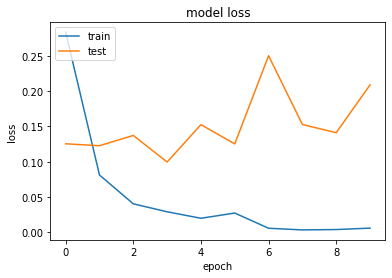

In [107]:
# Plot of validation loss and loss 
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

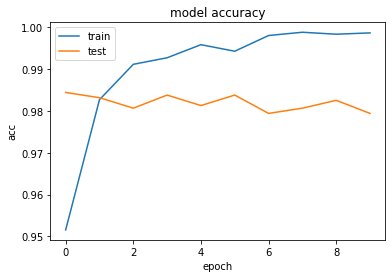

In [109]:
# Plot of validation accuracy and accuracy 
plt.plot(model_hist.history['acc'])
plt.plot(model_hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model_json = final_model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

final_model.save_weights("model.h5")
print("Done!")

Done!


# Testing the classifer

As we took testing samples for training as it was having perfectly 1000 samples.
Hence now we will take a test sample from thr training dataset of the kaggle. 
The names don't matters much as the fresh data is feeded to model for the testing.


Summary : 

Training  Process : 

1. No. of training samples = 800 each for cat and dog
2. No. of validation samples = 200 each for cat and dog

Testing Process : 

1. No. of test samples = 200 each for cat and dog

In [75]:
test_dir_cat = os.listdir("dataset/training_set/cats")
test_dir_dog = os.listdir("dataset/training_set/dogs")

test_set_cat = [os.path.join("dataset/training_set/cats",img) for img in test_dir_cat]
test_set_dog = [os.path.join("dataset/training_set/dogs",img) for img in test_dir_dog]

In [76]:
def show_images(r,c,images):
  rows, cols, axes  =  r,c,[]
  fig = plt.figure(figsize=(10,10))
  for i in range(rows*cols):
    axes.append(fig.add_subplot(rows,cols,i+1))
    im = cv2.imread(images[i])
    plt.imshow(np.asarray(im))
  plt.show()

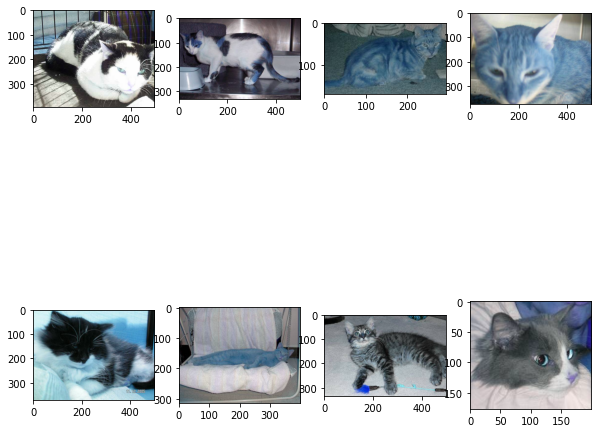

In [78]:
show_images(2,4,test_set_cat)

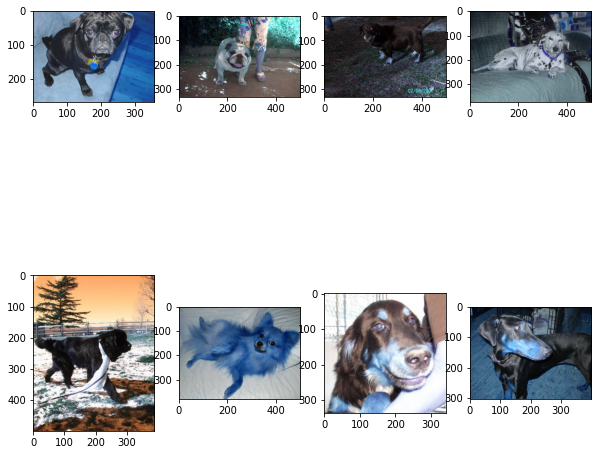

In [79]:
show_images(2,4,test_set_dog)

In [80]:
def create_test_samples(img_path, image_list ):
  test_data = []
  for img in image_list:
    im1 = cv2.imread(os.path.join(img_path,img))
    im1 = cv2.resize(im1,(224,224))
    test_data.append(im1)
  test_data = np.array(test_data)
  return test_data

In [87]:
# This contains cats sample for testing
test_set1 = create_test_samples("dataset/training_set/cats",test_dir_cat[100:300])
# This contains dogs sample for testing
test_set2 = create_test_samples("dataset/training_set/dogs",test_dir_dog[:200])
test_set1.shape,test_set2.shape

((200, 224, 224, 3), (200, 224, 224, 3))

In [103]:
def predict_cat_or_dog(test_img):
  pred = final_model.predict(test_img)
  pred = pred.argmax(axis=1)
  return pred

In [110]:
# Result of 200 test_samples of cats images ( 0: Cat and 1: Dog)
cat_test_result = predict_cat_or_dog(test_set1)
print(cat_test_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [111]:
# Result of 200 test_samples of dogs images ( 0: Cat and 1: Dog)
dog_test_res = predict_cat_or_dog(test_set2)
print(dog_test_res)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [113]:
# considering dog test samples :
predicted = np.count_nonzero(dog_test_res)
accuracy = (predicted / 200)*100
accuracy

91.0

In [117]:
# Considering cat test samples :
predicted = np.count_nonzero(cat_test_result)
accuracy = ((200 - predicted) / 200)*100       
accuracy

100.0